In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

sns.set(style="whitegrid") #white backdrop

In [2]:
# Import dataset provided 
df = pd.read_csv('aps_failure_set.csv')

In [3]:
#view dataset table - first 5 rows  
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [4]:
# last 5 rows
df.tail()   

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


In [5]:
#shape dataset - rows x columns 
df.shape

(60000, 171)

In [6]:
df.describe()   #Describe data

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [8]:
len(df)

60000

In [9]:
df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [10]:
df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [11]:
def get_correct_label(y):
    
    return y.replace(['neg','pos'],[0,1])

print(df['class'].unique())
df['class'] = get_correct_label(df['class'])
print(df['class'].unique())

['neg' 'pos']
[0 1]


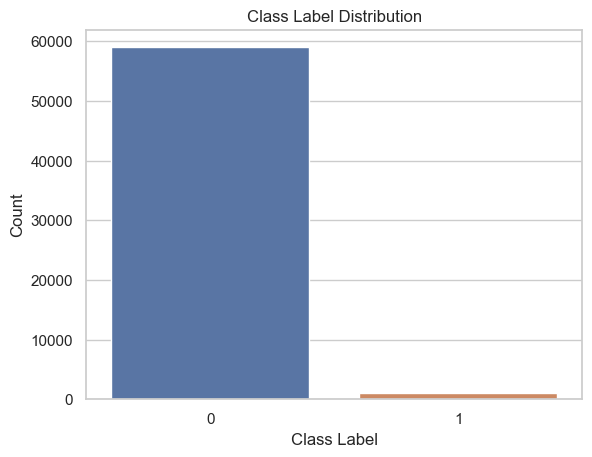

Number of Positive class points:  1000
Number of Negative class points:  59000


In [12]:
sns.barplot(data=df,x=df['class'].unique(),y=df['class'].value_counts())
plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

print('Number of Positive class points: ',df['class'].value_counts()[1])
print('Number of Negative class points: ',df['class'].value_counts()[0])

# Detecting Null Values 

In [13]:
df = pd.read_csv("aps_failure_set.csv", na_values = "na")

In [14]:
df.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [15]:
# checking for duplicte data
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 171)


# Dropping the Columns with over 75% missing/null values 

Judging by the large number of missing/null values detected above, I have decided to remove the columns with over 75% missing data. 

In [16]:
df.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

To drop the columns contianing over 75% missing/null values, I use the 'df.drop' function. Stating my axis as 1 will target the columns, while 0 by default will remove the records/rows. 

In [17]:
df.dtypes.value_counts()

float64    169
object       1
int64        1
dtype: int64

In [18]:
df.shape

(60000, 171)

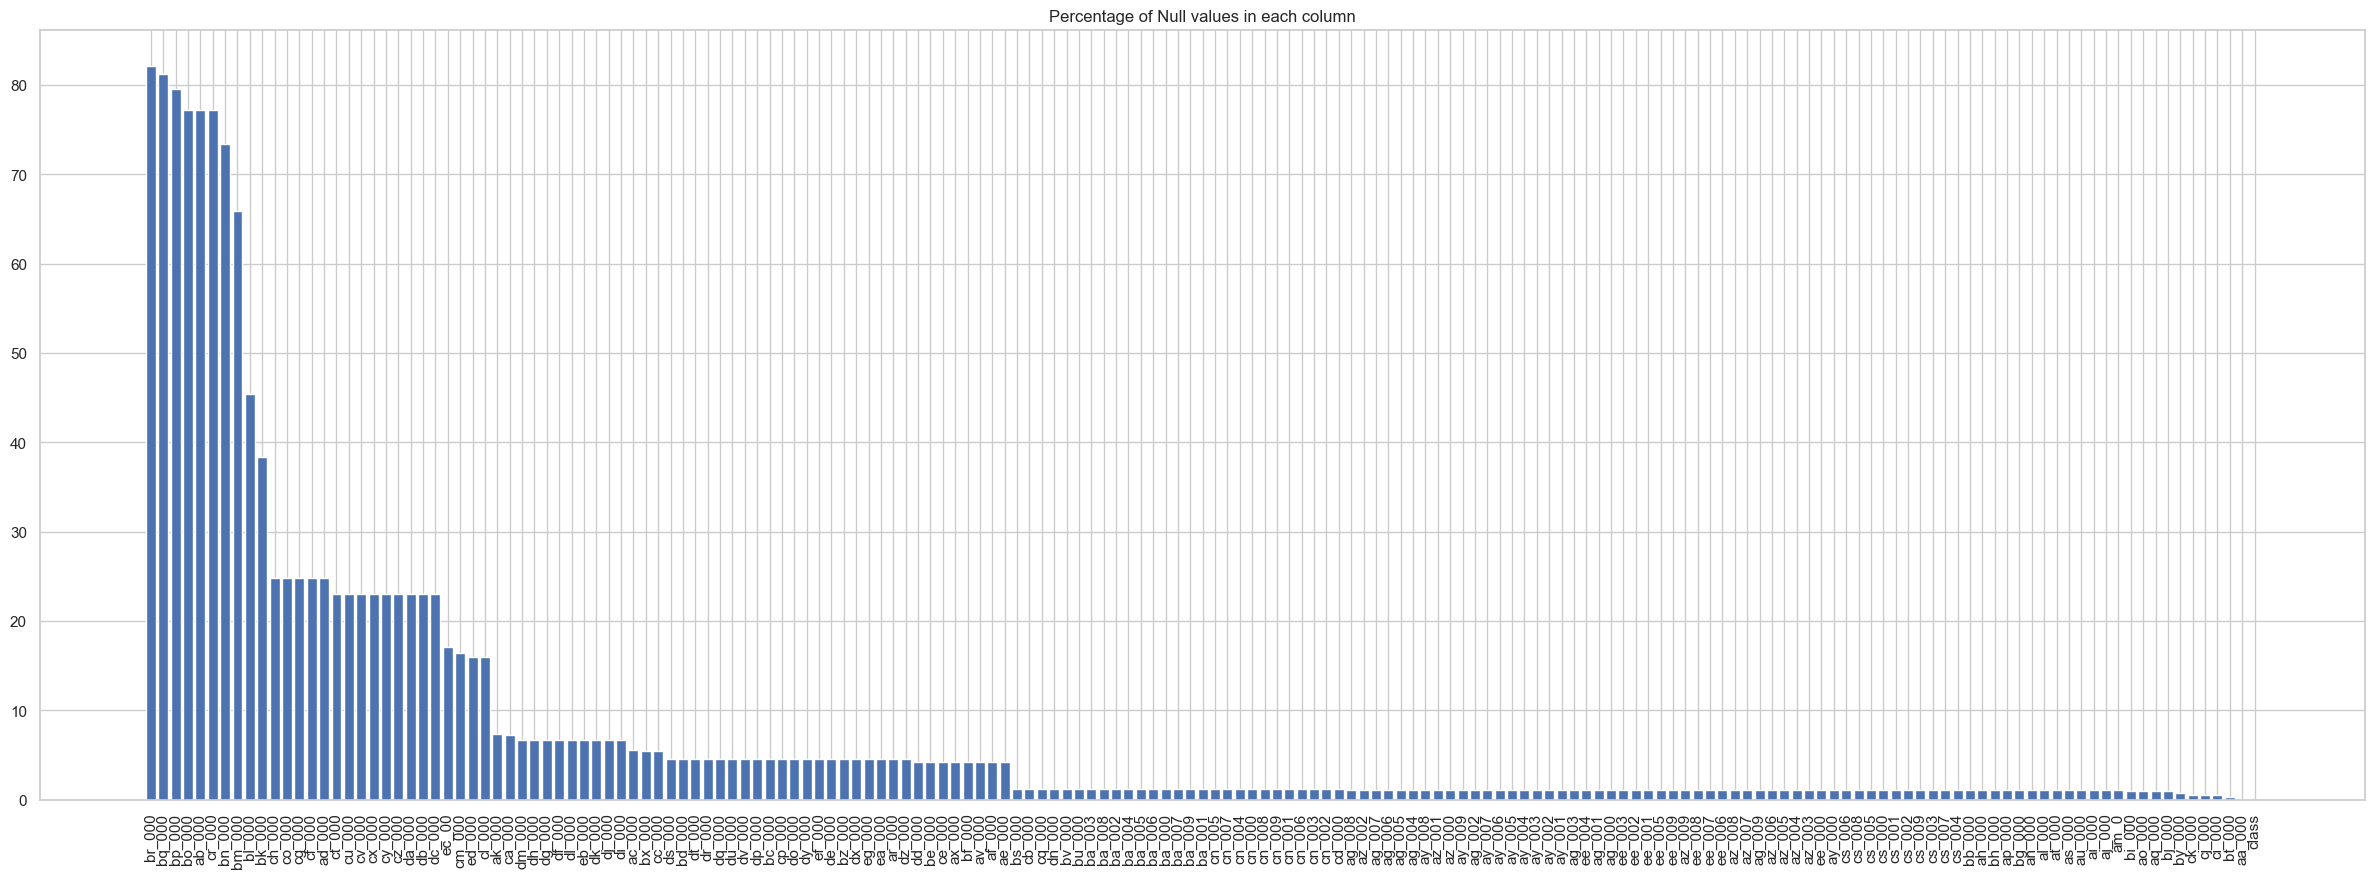

In [19]:
fig, ax = plt.subplots(figsize=(30,10))

nas =  df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(nas.index,nas.values.T[0])
plt.xticks(rotation=90) 

plt.title('Percentage of Null values in each column')
plt.show()

In [20]:
nas_cols = nas[nas[0]>75]
print("There are {} columns with null values above 75%.".format(len(nas_cols)))

There are 6 columns with null values above 75%.


In [21]:
cols_to_drop = list(nas_cols.index) 
cols_to_drop.append('class')
cols_to_drop

['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'class']

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
aa_000,60000.0,5.933650e+04,1.454301e+05,0.0,834.0,30776.0,48668.0,2.746564e+06
ab_000,13671.0,7.131885e-01,3.478962e+00,0.0,0.0,0.0,0.0,2.040000e+02
ac_000,56665.0,3.560143e+08,7.948749e+08,0.0,16.0,152.0,964.0,2.130707e+09
ad_000,45139.0,1.906206e+05,4.040441e+07,0.0,24.0,126.0,430.0,8.584298e+09
ae_000,57500.0,6.819130e+00,1.615434e+02,0.0,0.0,0.0,0.0,2.105000e+04
...,...,...,...,...,...,...,...,...
ee_007,59329.0,3.462714e+05,1.728056e+06,0.0,110.0,41098.0,167814.0,1.195801e+08
ee_008,59329.0,1.387300e+05,4.495100e+05,0.0,0.0,3812.0,139724.0,1.926740e+07
ee_009,59329.0,8.388915e+03,4.747043e+04,0.0,0.0,0.0,2028.0,3.810078e+06
ef_000,57276.0,9.057895e-02,4.368855e+00,0.0,0.0,0.0,0.0,4.820000e+02


In [23]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


### Filling in the missing NaN vaules with data

In [24]:
df.dtypes.value_counts()

float64    169
object       1
int64        1
dtype: int64

In [25]:
df.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [26]:
X = df.drop(cols_to_drop, axis=1)
y = df.loc[:,"class"]
y = pd.get_dummies(y).drop("neg",axis=1)

X.fillna(X.mean(), inplace=True)

## Standarisation of Data

In [27]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

## Creating a scorer 


In [28]:
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

def my_scorer(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp+500*fn
    return cost

my_func = make_scorer(my_scorer, greater_is_better=False)

# PCA

In [48]:
clf = SVC(probability = False, class_weight="balanced", gamma="auto") 
pca = PCA() 

pipe = Pipeline(steps=[("pca",pca), ("clf",clf)]) 

param_grid = {
    'pca__n_components': range(10,20),
    'clf__C': np.arange(0.2,0.5,0.05),
}

search = GridSearchCV(pipe, param_grid,
                      cv=3,
                      return_train_score=False,
                      scoring=my_func,
                      n_jobs=-1,
                      verbose=1)
search.fit(X_scaled, np.ravel(y))

print("Best parameters (CV score: {:0.3f}):".format(search.best_score_))
print(search.best_params_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


KeyboardInterrupt: 

AttributeError: 'GridSearchCV' object has no attribute 'named_steps'

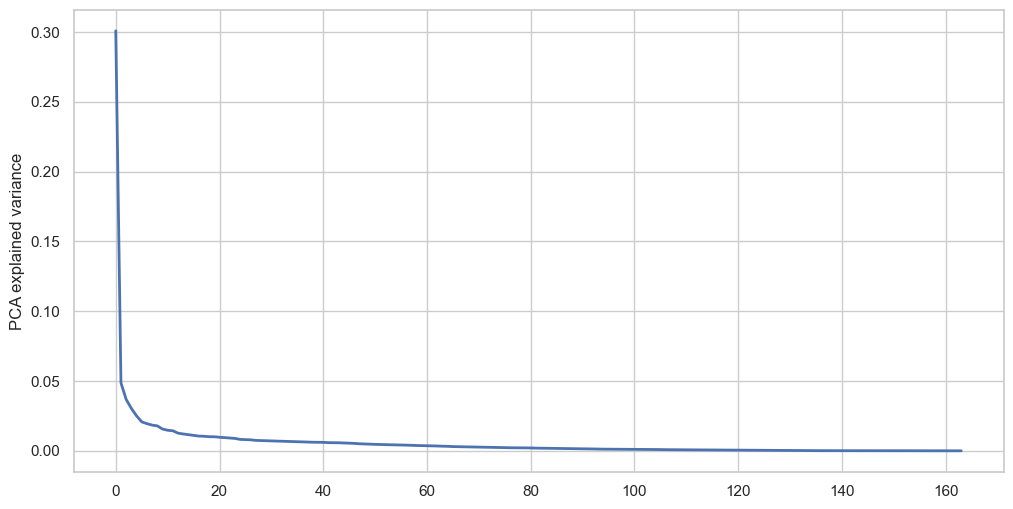

In [40]:
pca.fit(X_scaled)

fig, ax0 = plt.subplots(nrows=1, sharex=True, figsize=(12, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')
ax0.axvline(search.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))
plt.show()

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

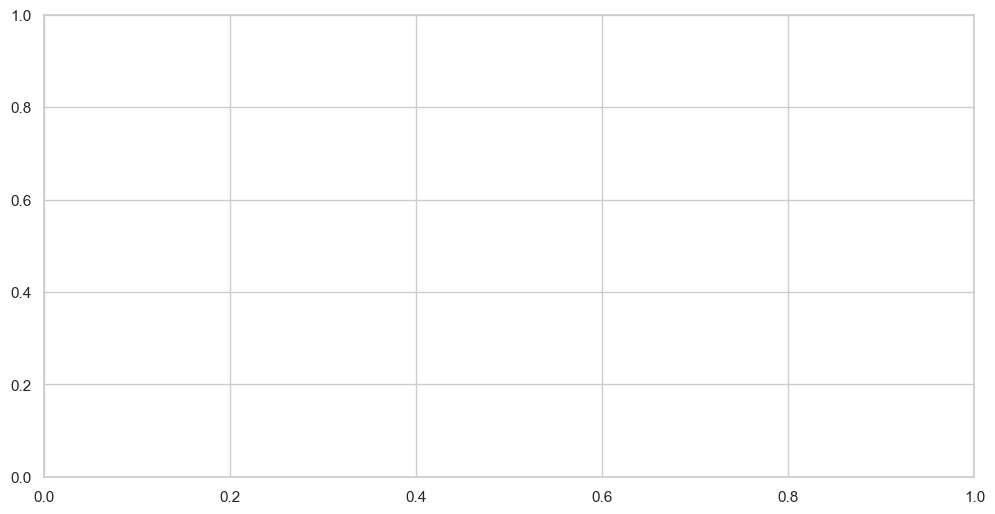

In [41]:
fig, ax1 = plt.subplots(nrows=1, sharex=True, figsize=(12, 6))

results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',legend=False, ax=ax1)

ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.tight_layout()
plt.show()